In [1]:
setwd("/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts")
suppressPackageStartupMessages(source("tree_helper_function.R"))
suppressPackageStartupMessages(library(sva))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(beaveR))

In [2]:
metaData <- read.delim("/fs/cbcb-lab/rob/students/noor/Uncertainity/ChimpData/SYNAPSE_METADATA_MANIFEST.tsv")
quantDir <- "/fs/cbcb-lab/rob/students/noor/Uncertainity/ChimpData/sal_out/mode_gcbias=True/posttype=gibbs_npost=100_tf=100"

In [11]:
suppressPackageStartupMessages(library(dplyr))
tissuesOfInt <- c("cerebellum", "medial dorsal nucleus of thalamus")
metaData <- metaData %>% 
    filter(tissue %in% tissuesOfInt)
dim(metaData)[1] == 10
samples <- sapply(strsplit(metaData[["path"]],"/", fixed = T), function(x) 
        sapply(strsplit(x[[length(x)]], ".", fixed = T), function(x) x[1]))
files <- file.path(quantDir, samples, "quant.sf")
all(file.exists(files))
colData <- data.frame(files = files, names = samples, tissue = as.factor(metaData[["tissue"]]))
clustFile <- "/fs/cbcb-lab/rob/students/noor/Uncertainity/ChimpData/term_out/mode_gcbias=True/posttype=gibbs_npost=100_tf=100//nothr0//cluster_nwk.txt"
tseChimp <- buildTSE(treeTermFile = clustFile, coldata = colData)

[1] TRUE

[1] TRUE

reading tree

importing quantifications

reading in files with read.delim (install 'readr' package for speed up)

1 
2 
3 
4 
5 
6 


In [7]:
suppressPackageStartupMessages(library(GenomicFeatures))
tree <- rowTree(tseChimp)
nleaves <- length(tree$tip)
txdb <- makeTxDbFromGFF(file="/fs/cbcb-lab/rob/students/noor/Uncertainity/ChimpData/refseq_ind/Pan_troglodytes.Pan_tro_3.0.104.gtf.gz")
k <- keys(txdb, keytype = "TXNAME")
tx2gene <- select(txdb, k, "GENEID", "TXNAME")
tnames <- sapply(strsplit(rownames(tseChimp)[1:nleaves], split=".", fixed=T), function(x) x[1])
names(tnames) <- rownames(tseChimp)[1:nleaves]

In [14]:
rData <- tx2gene[match(tnames[rownames(tseChimp)[1:nleaves]], tx2gene[,"TXNAME"]),]
desc <- lapply(lapply(Descendants(tree, (nleaves+1):nrow(tseChimp)), function(nodes) rownames(tseChimp)[nodes]), function(txps) {
  tx2gene[match(tnames[txps], tx2gene[,"TXNAME"]), "GENEID"]  
})
rData <- rbind(rData, data.frame("TXNAME"=rownames(tseChimp)[(nleaves+1):nrow(tseChimp)], 
                                 "GENEID" = as.character(sapply(desc, length))))

In [31]:
saveDir <- "/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts/environment/Chimp/DE"
save(tseChimp, file = file.path(saveDir, "tseChimp.RData"))

In [3]:
saveDir <- "/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts/environment/Chimp/DE"
load(file.path(saveDir, "tseChimp.RData"))

using counts and average transcript lengths from tximeta

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

using 'avgTxLength' from assays(dds), correcting for library size



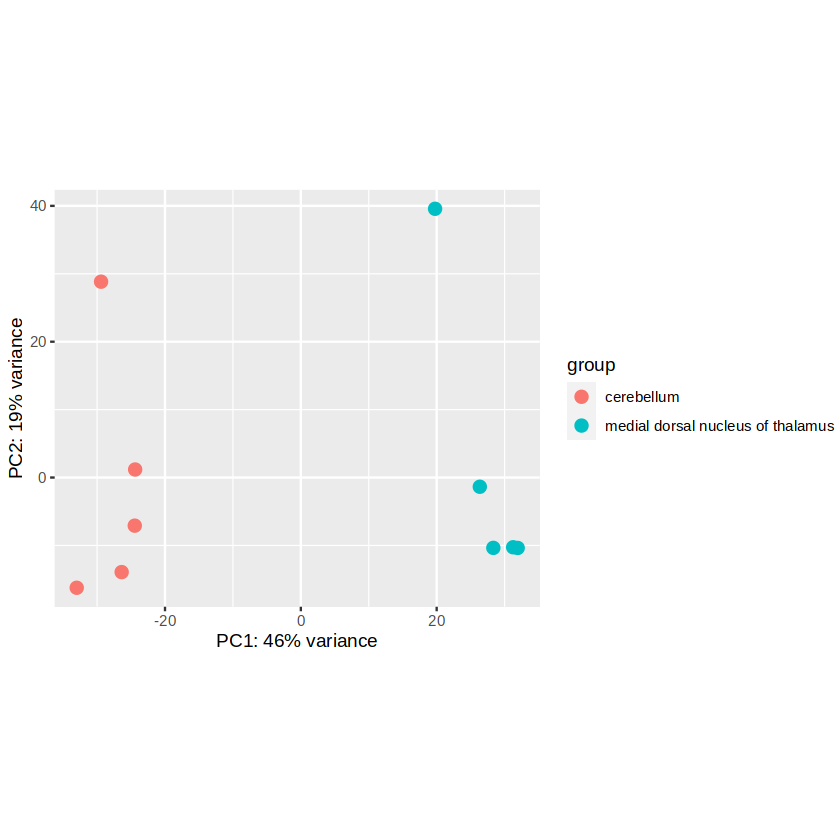

In [19]:
dds <- DESeqDataSet(tseChimp[1:nleaves,], design=~tissue)
dds <- estimateSizeFactors(dds)
dds <- dds[rowSums(assays(dds)[["counts"]]) > 10,]
vsd <- vst(dds)
plotPCA(vsd, intgroup=c("tissue"), ntop=1000)

In [20]:
y <- fishpond::scaleInfReps(tseChimp[1:nleaves,])

In [19]:
infRepIdx <- grep("infRep",assayNames(y),value=TRUE)
nreps <- length(infRepIdx)

mm <- model.matrix(~tissue, colData(dds))
mm0 <- model.matrix(~ 1, colData(dds))
norm.cts <- counts(dds, normalized=TRUE)
norm.cts <- norm.cts[rowSums(norm.cts) > 0,]

Number of significant surrogate variables is:  2 
Iteration (out of 5 ):1  2  3  4  5   [1] 6.164971e-01 1.433204e-01 8.528966e-02 4.308629e-02 3.997626e-02
 [6] 3.171040e-02 1.861200e-02 1.409744e-02 7.410485e-03 4.446791e-32
Number of significant surrogate variables is:  3 
Iteration (out of 5 ):1  2  3  4  5   [1] 6.377240e-01 1.415755e-01 8.560042e-02 4.299995e-02 3.744960e-02
 [6] 2.209903e-02 1.589117e-02 1.032013e-02 6.340259e-03 4.719067e-32


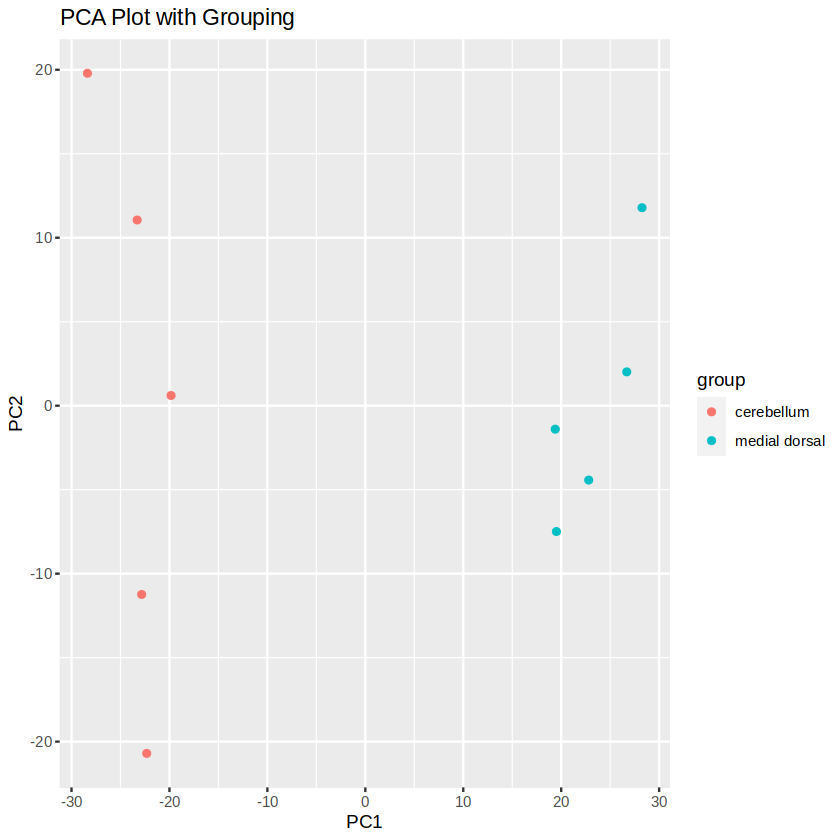

Number of significant surrogate variables is:  4 
Iteration (out of 5 ):1  2  3  4  5   [1] 6.809440e-01 1.412906e-01 6.037534e-02 4.533721e-02 2.582442e-02
 [6] 1.540476e-02 1.381199e-02 9.847539e-03 7.164160e-03 3.948849e-32


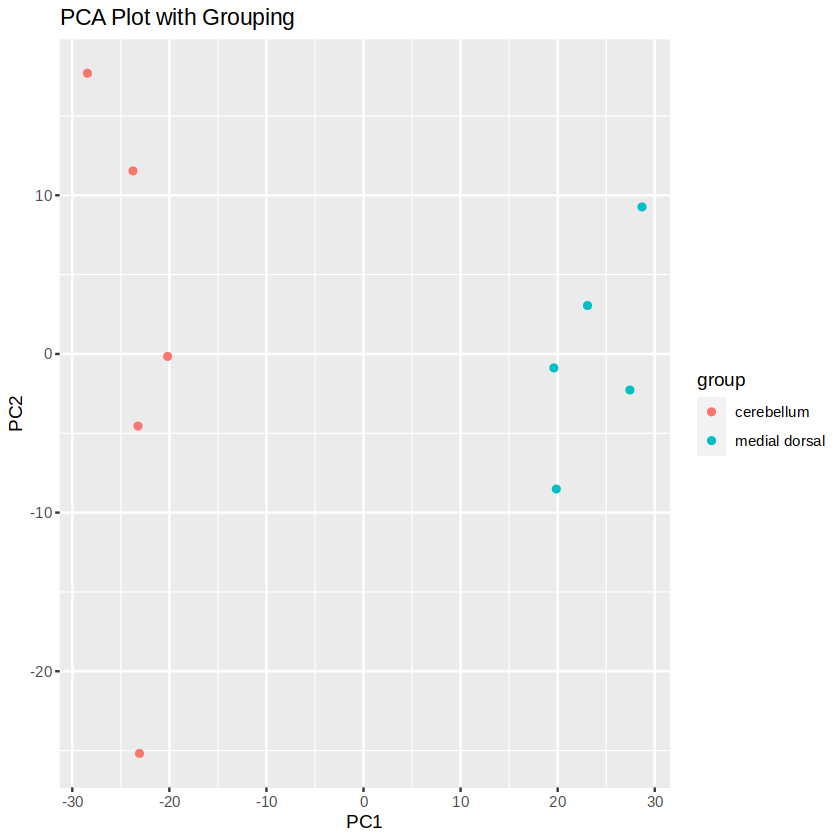

Number of significant surrogate variables is:  5 
Iteration (out of 5 ):1  2  3  4  5   [1] 7.781868e-01 9.382790e-02 6.250687e-02 3.077026e-02 1.767722e-02
 [6] 9.590588e-03 7.427609e-03 1.181437e-05 9.315282e-07 4.053689e-32


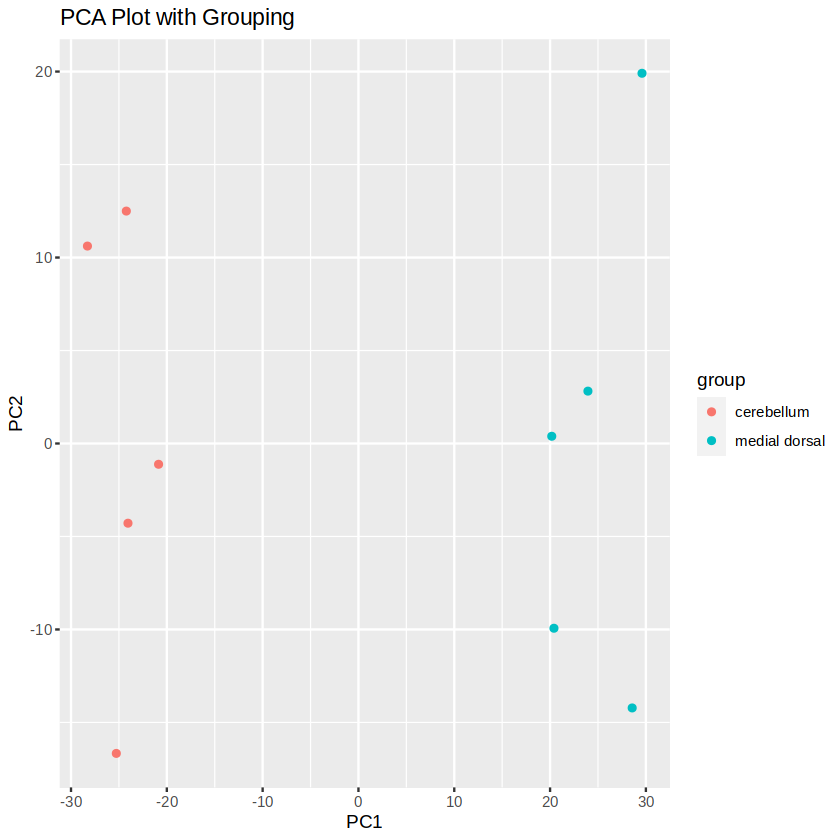

Number of significant surrogate variables is:  6 
Iteration (out of 5 ):1  2  3  4  5   [1] 8.649573e-01 7.615906e-02 3.749733e-02 1.095065e-02 1.042460e-02
 [6] 8.527645e-06 1.986483e-06 3.316610e-07 2.336853e-07 3.824892e-32


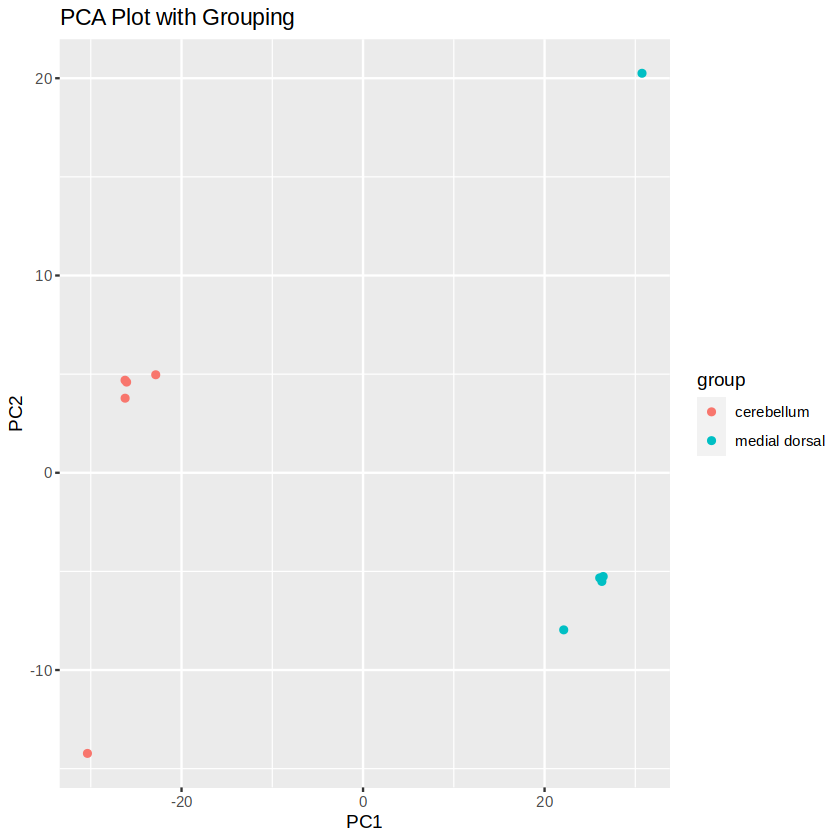

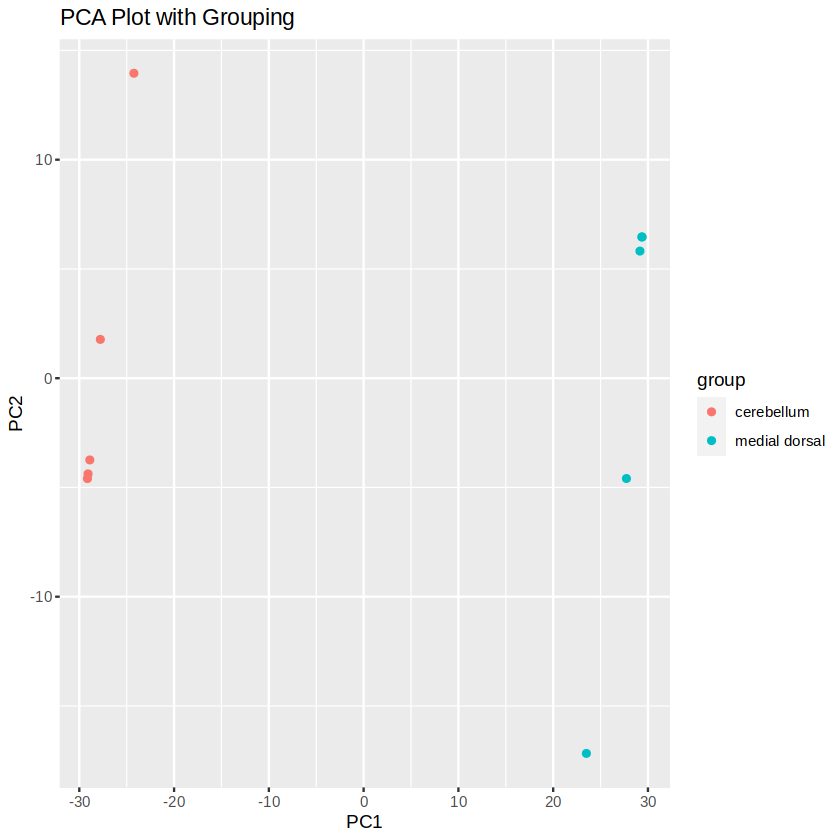

In [34]:
for(sv in c(2:6)) {
        fit <- svaseq(norm.cts, mod=mm, mod0=mm0, n.sv=sv)
        pc <- .1
        yo <- y
        for (k in seq_len(nreps)) {
            logInfRep <- log(assay(yo, infRepIdx[k]) + pc)
            logInfRep <- limma::removeBatchEffect(
              logInfRep,
              covariates=fit[["sv"]],
              design=mm)
              assay(yo, infRepIdx[k]) <- exp(logInfRep)
        }
        
        top <- order(rowVars(assays(yo)[["infRep1"]]), decreasing = T)[1:1000]
        pca <- prcomp(t(assays(yo)[["infRep1"]][top,]), scale. = T)
        
        scores <- data.frame(pca$x[,1:2], group = factor(rep(c("cerebellum", "medial dorsal"), each = 5)),
                    var = pca$sdev^2/sum(pca$sdev^2))

        print(scores[["var"]])
        print(ggplot(scores, aes(x = PC1, y = PC2, color = group)) +
          geom_point() +
          xlab("PC1") +
          ylab("PC2") +
          ggtitle("PCA Plot with Grouping"))
}


#### Correcting batch effects using sv = 2

In [23]:
fit <- svaseq(norm.cts, mod=mm, mod0=mm0, n.sv=2)
for (k in seq_len(nreps)) {
    logInfRep <- log(assay(y, infRepIdx[k]) + 0.1)
    logInfRep <- limma::removeBatchEffect(
      logInfRep,
      covariates=fit[["sv"]],
      design=mm)
      assay(y, infRepIdx[k]) <- exp(logInfRep)
}


Number of significant surrogate variables is:  2 
Iteration (out of 5 ):1  2  3  4  5  

 [1] 6.164971e-01 1.433204e-01 8.528966e-02 4.308629e-02 3.997626e-02
 [6] 3.171040e-02 1.861200e-02 1.409744e-02 7.410485e-03 4.446791e-32


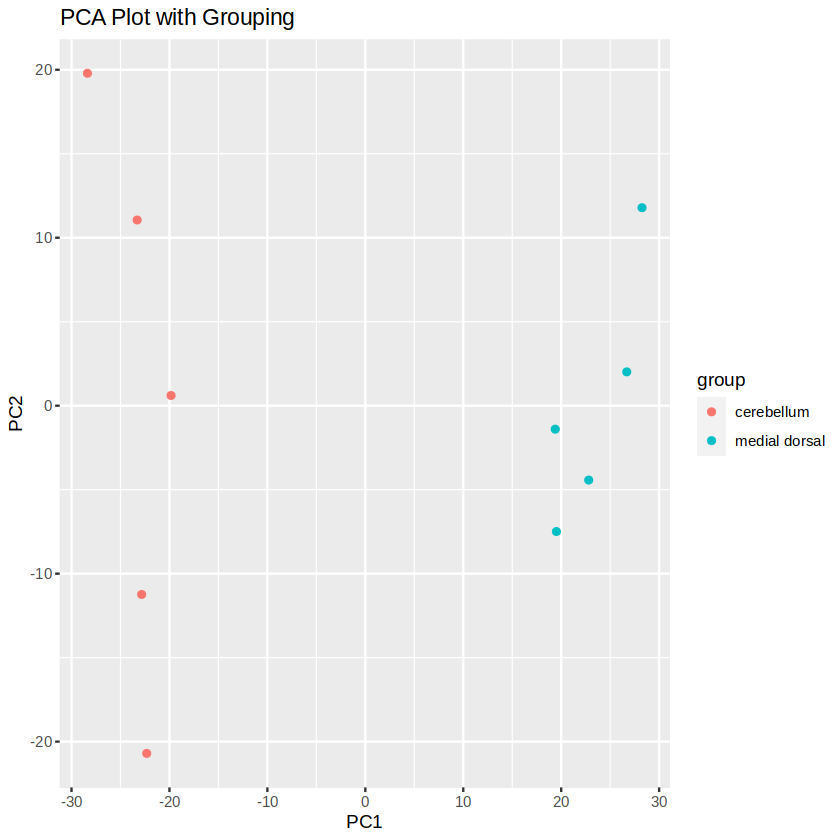

In [36]:
top <- order(rowVars(assays(y)[["infRep1"]]), decreasing = T)[1:1000]
pca <- prcomp(t(assays(y)[["infRep1"]][top,]), scale. = T)
        
scores <- data.frame(pca$x[,1:2], group = factor(rep(c("cerebellum", "medial dorsal"), each = 5)),
            var = pca$sdev^2/sum(pca$sdev^2))

print(scores[["var"]])
print(ggplot(scores, aes(x = PC1, y = PC2, color = group)) +
  geom_point() +
  xlab("PC1") +
  ylab("PC2") +
  ggtitle("PCA Plot with Grouping"))

In [37]:
y <- labelKeep(y)
set.seed(10)
y <- swish(y, x="tissue")
sum(mcols(y)[["pvalue"]] < 0.1, na.rm=T)
save(y, file=file.path(saveDir, "y.RData"))

[1] 13831

In [24]:
tseChimp <- computeInfRV(tseChimp)
yAll <- computeSizeFactors(tseChimp)
yAll <- scaleInfReps(yAll)

Setting inf rep depth to mean depth



Progress:   1 on 100Progress:   2 on 100Progress:   3 on 100Progress:   4 on 100Progress:   5 on 100Progress:   6 on 100Progress:   7 on 100Progress:   8 on 100Progress:   9 on 100Progress:  10 on 100Progress:  11 on 100Progress:  12 on 100Progress:  13 on 100Progress:  14 on 100Progress:  15 on 100Progress:  16 on 100Progress:  17 on 100Progress:  18 on 100Progress:  19 on 100Progress:  20 on 100Progress:  21 on 100Progress:  22 on 100Progress:  23 on 100Progress:  24 on 100Progress:  25 on 100Progress:  26 on 100Progress:  27 on 100Progress:  28 on 100Progress:  29 on 100Progress:  30 on 100Progress:  31 on 100Progress:  32 on 100Progress:  33 on 100Progress:  34 on 100Progress:  35 on 100Progress:  36 on 100Progress:  37 on 100Progress:  38 on 100Progress:  39 on 100Progress:  40 on 100Progress:  41 on 100Progress:  42 on 100Progress:  43 on 100Progress:  44 on 100Progress:  45 on 100Progress:  46 on 100Progress:  47 on 100Progress:  48 on 100Progress:  49 on 100Progress:  50 on 100

In [25]:

mm <- model.matrix(~tissue, colData(dds))
mm0 <- model.matrix(~ 1, colData(dds))
norm.cts <- counts(dds, normalized=TRUE)
norm.cts <- norm.cts[rowSums(norm.cts) > 0,]

fit <- svaseq(norm.cts, mod=mm, mod0=mm0, n.sv=2)
pc <- .1

for (k in seq_len(nreps)) {
    logInfRep <- log(assay(yAll, infRepIdx[k]) + pc)
    logInfRep <- limma::removeBatchEffect(
      logInfRep,
      covariates=fit[["sv"]],
      design=mm)
      assay(yAll, infRepIdx[k]) <- exp(logInfRep)
}
        

Number of significant surrogate variables is:  2 
Iteration (out of 5 ):1  2  3  4  5  

#### Run Swish

In [25]:
yAll <- labelKeep(yAll)
set.seed(10)
yLeaves <- swish(yAll[1:nleaves,], x="condition")
yAll <- swish(yAll, x = "tissue")
save(yAll, file=file.path(saveDir, "yAll.RData"))

### Gene Level

In [6]:
load("environment/Chimp/se_chimp.RData")
gy <- summarizeToGene(seChimp)
gy <- gy[,colnames(tseChimp)]

loading existing EnsDb created: 2023-05-07 17:27:02

obtaining transcript-to-gene mapping from database

loading existing gene ranges created: 2023-05-07 17:27:18

summarizing abundance

summarizing counts

summarizing length

summarizing inferential replicates



using counts and average transcript lengths from tximeta

Warning message in DESeqDataSet(gy, design = ~tissue):
"some variables in design formula are characters, converting to factors"
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

using 'avgTxLength' from assays(dds), correcting for library size



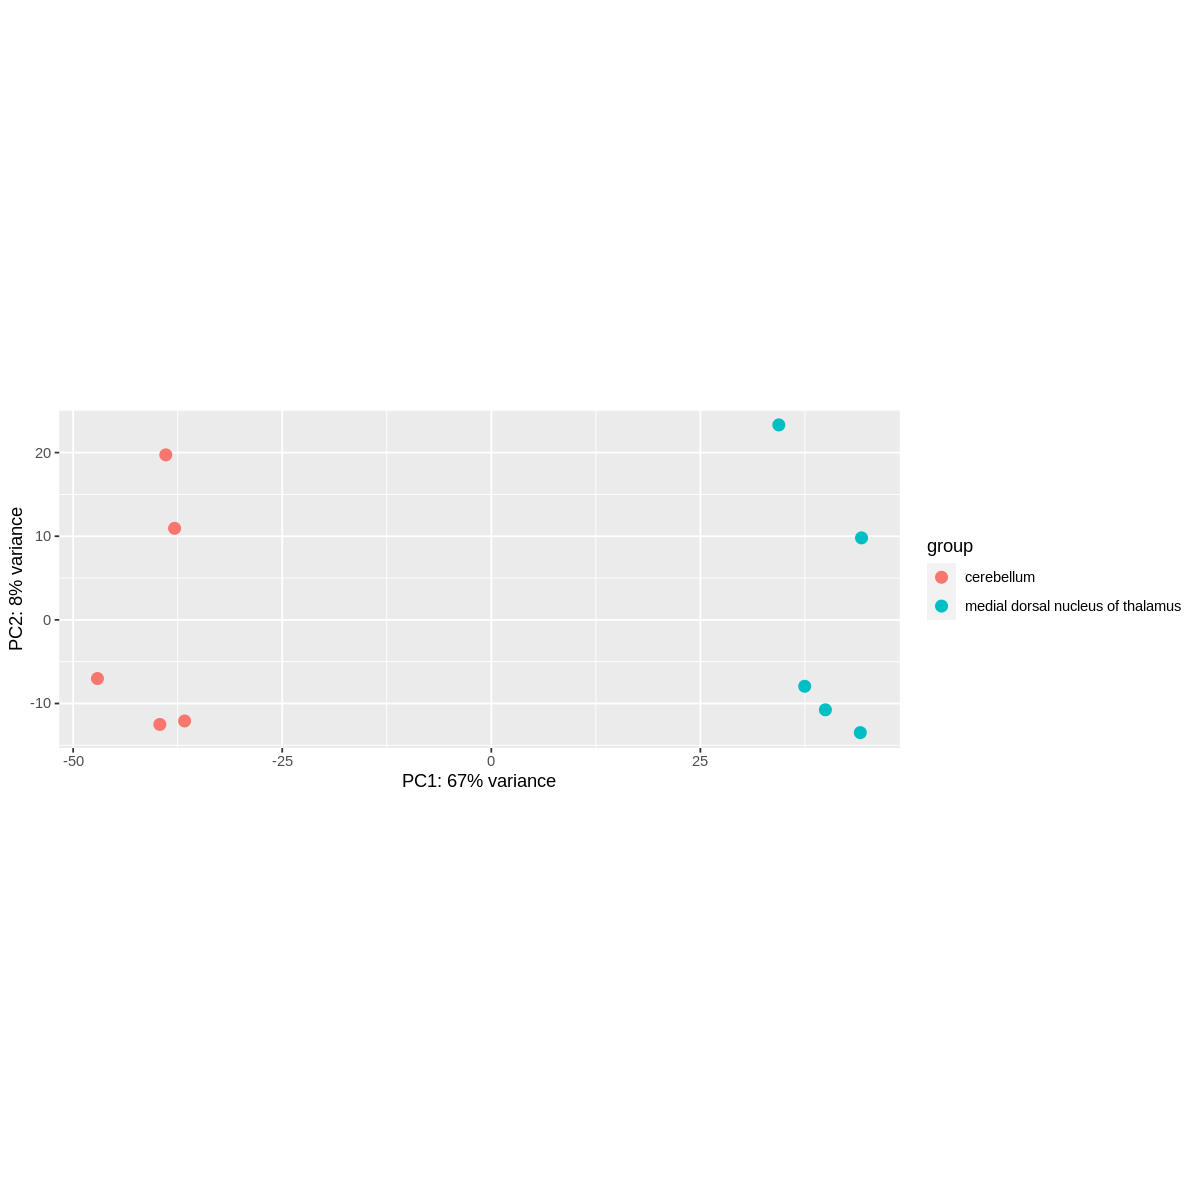

In [14]:
options(repr.plot.width=10, repr.plot.height=10)
dds <- DESeqDataSet(gy, design=~tissue)
dds <- estimateSizeFactors(dds)
dds <- dds[rowSums(assays(dds)[["counts"]]) > 10,]
vsd <- vst(dds)
plotPCA(vsd, intgroup=c("tissue"), ntop=1000)

In [27]:
infRepIdx <- grep("infRep",assayNames(gy),value=TRUE)
nreps <- length(infRepIdx)

mm <- model.matrix(~tissue, colData(dds))
mm0 <- model.matrix(~ 1, colData(dds))
norm.cts <- counts(dds, normalized=TRUE)
norm.cts <- norm.cts[rowSums(norm.cts) > 0,]

In [28]:
yg <- gy
yg <- fishpond::scaleInfReps(yg)
yg <- labelKeep(yg)
head(assays(yg)[["infRep1"]])

,PTB162LCBC,PTB167RCBC,PTB165RCBC,PTB164RCBC,PTB166RCBC,PTB162LMD,PTB164RMD,PTB165RMD,PTB167RMD,PTB166RMD
ENSPTRG00000000001,533.62925,658.70578,567.91209,516.24892,509.585960,554.822700,562.443078,601.545064,497.773546,542.746419
ENSPTRG00000000008,34.01165,24.89591,24.86007,25.30920,9.499532,5.057994,1.847346,1.966198,1.460110,0.000000
ENSPTRG00000000009,11.24939,6.51677,15.75978,11.31511,1.388065,0.000000,0.000000,3.658394,5.169867,3.857259
ENSPTRG00000000017,15.02010,38.71897,40.33287,42.71026,20.887449,3.506911,5.484086,9.342973,8.973062,9.116367
ENSPTRG00000000021,35.27046,51.51004,37.93987,49.98415,54.498555,44.125168,20.512092,28.963543,15.813133,24.919758
ENSPTRG00000000024,299.22394,444.92378,446.95234,341.85931,401.421709,279.588189,333.662432,375.401913,395.591293,197.810197


In [29]:
fit <- svaseq(norm.cts, mod=mm, mod0=mm0, n.sv=2)
pc <- .1
for (k in seq_len(nreps)) {
    logInfRep <- log(assay(yg, infRepIdx[k]) + pc)
    logInfRep <- limma::removeBatchEffect(
      logInfRep,
      covariates=fit[["sv"]],
      design=mm)
      assay(yg, infRepIdx[k]) <- exp(logInfRep)
}
head(assays(yg)[["infRep1"]])

Number of significant surrogate variables is:  2 
Iteration (out of 5 ):1  2  3  4  5  

,PTB162LCBC,PTB167RCBC,PTB165RCBC,PTB164RCBC,PTB166RCBC,PTB162LMD,PTB164RMD,PTB165RMD,PTB167RMD,PTB166RMD
ENSPTRG00000000001,540.07699,651.250922,556.38732,507.949508,528.637902,559.0530165,552.34017444,591.999766,488.738327,568.3147608
ENSPTRG00000000008,15.44575,18.178866,18.95414,18.199438,48.044588,1.9633587,1.45387708,1.818232,1.072711,0.6487362
ENSPTRG00000000009,27.90414,6.011175,10.80429,9.144413,1.309833,0.2459835,0.07371446,2.615557,4.095752,3.7606410
ENSPTRG00000000017,28.35392,35.800038,30.27305,36.001119,20.213225,6.7259167,4.42587000,7.217542,7.452946,9.4706259
ENSPTRG00000000021,29.95063,53.746164,42.28008,53.766812,51.357169,37.8139867,22.51104643,31.874809,17.244817,22.7779799
ENSPTRG00000000024,360.43054,412.649701,379.41470,303.613754,481.063300,328.8531495,290.01316443,327.535270,345.889604,252.0337325


 [1] 6.277433e-01 1.680496e-01 7.860450e-02 4.276964e-02 2.860116e-02
 [6] 2.657255e-02 1.648077e-02 7.475061e-03 3.703419e-03 5.745697e-32


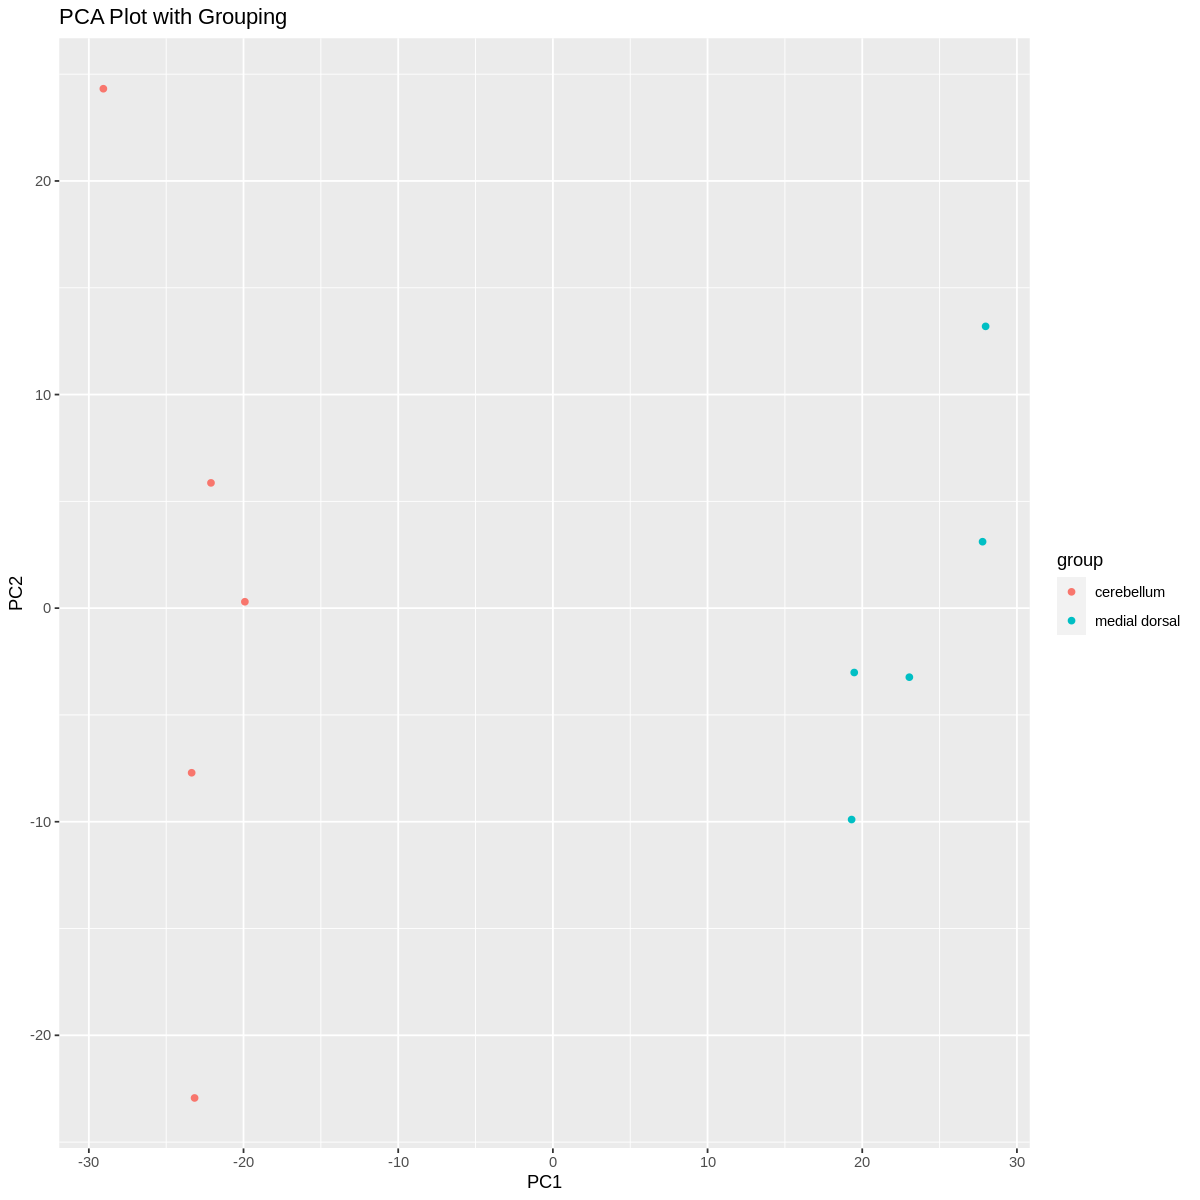

In [30]:
top <- order(rowVars(assays(yg)[["infRep1"]]), decreasing = T)[1:1000]
pca <- prcomp(t(assays(yg)[["infRep1"]][top,]), scale. = T)
        
scores <- data.frame(pca$x[,1:2], group = factor(rep(c("cerebellum", "medial dorsal"), each = 5)),
            var = pca$sdev^2/sum(pca$sdev^2))

print(scores[["var"]])
print(ggplot(scores, aes(x = PC1, y = PC2, color = group)) +
  geom_point() +
  xlab("PC1") +
  ylab("PC2") +
  ggtitle("PCA Plot with Grouping"))

In [32]:
# yg <- labelKeep(yg)
# yg <- yg[mcols(yg)$keep,]
# colData(yg)[["tissue"]] <- as.factor(colData(yg)[["tissue"]])
# set.seed(10)
# yg <- swish(yg, x="tissue")
# sum(mcols(yg)[["qvalue"]] < 0.1, na.rm=T)
save(yg, file = file.path(saveDir, "yg.RData"))

#### Not doing batch effect correction

In [7]:
yg <- gy
yg <- fishpond::scaleInfReps(yg)
yg <- labelKeep(gy)
colData(yg)[["tissue"]] <- as.factor(colData(yg)[["tissue"]])
set.seed(10)
yg <- swish(yg, x="tissue")

In [36]:
load(file.path(saveDir, "treeDEFDR_OL.RData"))
load(file.path(saveDir, "tAfterBHMoreClimbMIRV.RData"))
length(treeDEFDR_OL[[1]][[3]])
length(tAfterBHMoreClimbMIRV[[1]][[3]])

[1] 12017

[1] 12054

In [35]:
mcols(yAll)

DataFrame with 72118 rows and 10 columns
                                 TXNAME             GENEID log10mean      keep
                            <character>        <character> <numeric> <logical>
ENSPTRT00000056608.3 ENSPTRT00000056608 ENSPTRG00000029293   1.12409      TRUE
ENSPTRT00000097029.1 ENSPTRT00000097029 ENSPTRG00000045967   0.99736      TRUE
ENSPTRT00000078887.1 ENSPTRT00000078887 ENSPTRG00000045563   1.44051      TRUE
ENSPTRT00000107769.1 ENSPTRT00000107769 ENSPTRG00000047067   2.25565      TRUE
ENSPTRT00000110338.1 ENSPTRT00000110338 ENSPTRG00000048116   1.13937      TRUE
...                                 ...                ...       ...       ...
Node72114                     Node72114                  2   2.05323      TRUE
Node72115                     Node72115                  2   3.38805      TRUE
Node72116                     Node72116                  2   2.52980      TRUE
Node72117                     Node72117                  2   2.37664      TRUE
Node72118  